# Using Numpy

From the numpy website [numpy.org](https://numpy.org/) :

```
NumPy is the fundamental package for scientific computing with Python. It contains among other things:

* a powerful N-dimensional array object
* sophisticated (broadcasting) functions
* tools for integrating C/C++ and Fortran code
* useful linear algebra, Fourier transform, and random number capabilities

Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases.

```

Numpy allows us to easily work with vectors, matrices, and more in Python. It provides a high-performance multidimensional array object as well as tools for working with these arrays. It is the industry standard for calculations such as this in Python.

## Arrays

A numpy array is a grid of values, and is indexed by a tuple (an immutable ordered list of values) of nonnegative integers. Numpy arrays can be similar to Python lists, but have much more functionality to allow them to be used for matrix math. 

In [1]:
import numpy as np

# Create an array
a = np.array([1, 2, 3])

# We can do many of the same operations as lists
print(type(a))            # Prints "<class 'numpy.ndarray'>"
print(a.shape)            # Prints "(3,)"
print(a[0], a[1], a[2])   # Prints "1 2 3"
a[0] = 5                  # Change an element of the array
print(a)                  # Prints "[5, 2, 3]"


# We can create lists with other lists, also known as "rank 2"
b = np.array([[1,2,3],[4,5,6]])
print(b.shape)                     # Prints "(2, 3)"
print(b[0, 0], b[0, 1], b[1, 0])   # Prints "1 2 4"


<class 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]
(2, 3)
1 2 4


Numpy also provides many functions to create arrays. You can read about more of them in the [documenation](https://docs.scipy.org/doc/numpy/user/basics.creation.html#arrays-creation)

In [2]:
# Create an array of all zeros

a = np.zeros((2,2))   
print(a)

# Create an array of all ones
b = np.ones((1,2))
print(b)

# Create a constant array
c = np.full((2,2), 7)  
print(c)

# Create an array filled with random values
e = np.random.random((2,2))
print(e)

[[0. 0.]
 [0. 0.]]
[[1. 1.]]
[[7 7]
 [7 7]]
[[0.47710536 0.30250798]
 [0.52020698 0.25338337]]


### Array indexing

Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [3]:
# Create the following rank 1 array

a = np.array([9,10,11,12])

# Use slicing to pull out the subarray consisting of the first 2 rows

b = a[:2]

print(b)


[ 9 10]


### Array Math

Python allows something called "[operator overloading](https://www.geeksforgeeks.org/operator-overloading-in-python/)". This allows programmers to define the interactions between two variables being operated on by one another. Think of this in terms of how vector addition or scalar multiplication are performed. Python also allows array math to be done via built in functions. Both are outlined below:

In [4]:
x = np.array([1,2], dtype=np.float64)
y = np.array([5,6], dtype=np.float64)

scalar = 5

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))


# Scalar multiplication
print(x * scalar)
print(np.multiply(x, scalar))


[6. 8.]
[6. 8.]
[-4. -4.]
[-4. -4.]
[ 5. 10.]
[ 5. 10.]


### Dot product

We won't get into the details of what the dot product is yet, but it will be important to recognize it. The dot product always returns a scalar.

In [5]:
a = np.array([1,-2,2])
b = np.array([0,2,3])
c = np.dot(a, b)
print(c)

2


## Pandas

Pandas is super useful for working with tabular data. We'll largely be using Pandas for its DataFrame structure, a 2-D labeled data structure wtih columns of potentially different types. Essentially, it's Excel spreadsheets in Python! This is a really useful represenation for large datasets. Just like with Excel, Pandas DataFrame provides functionalities to analyze, change, and extract valuable information from the given dataset.

### Creating a dataframe

Pandas will load many different data structures as a starting point, but we can look at the case of a dictionary:

In [6]:
my_dict = { 
     'name' : ["a", "b", "c", "d", "e","f", "g"],
     'age' : [20,27, 35, 55, 18, 21, 35],
     'designation': ["VP", "CEO", "CFO", "VP", "VP", "CEO", "MD"]
}

We can easily to turn this into a DataFrame:

In [7]:
import pandas as pd
df = pd.DataFrame(my_dict)
df.head() # This displays the first five rows of the DataFrame
# df.head(10) # You can specify how many rows to display
# df.tail() # Or look at the tail

,name,age,designation
0,a,20,VP
1,b,27,CEO
2,c,35,CFO
3,d,55,VP
4,e,18,VP


You can read more about using Pandas [here](https://towardsdatascience.com/pandas-dataframe-a-lightweight-intro-680e3a212b96) or peruse the Pandas documentation [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)

## Classification

Classification is one of the most basic supervised machine learning tasks in which a computer program learns from data input given to it, and uses this learning classify a new observation. The data set used could be bi-class (rainy vs sunny) or multiclass (soccer ball, football, basketball etc). Some examples of classification problems are: speech recognition, handwriting recognition, and image classification.

### Our dataset

For this exercise we will be exploring the [iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set), a commonly used "toy data set" (very small) for illustrative purposes. The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, measured in centimeters. The data set is built in to ```sklearn```, you can see what other datasets are available [here](https://scikit-learn.org/stable/datasets/index.html#toy-datasets).

In [8]:
import numpy as np
from sklearn.datasets import load_iris

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load iris and grab our data and labels
iris = load_iris()
labels, data = iris.target, iris.data

target_names = iris.target_names

iris_df = pd.DataFrame(data, columns = iris.feature_names)

Pandas allows us to convenently take a look at a subsample of our dataset in table form

In [9]:
# Adding the label number and label names to our dataframe
iris_df['label'] = labels
iris_df['label_name'] = np.array([iris.target_names[l] for l in labels])

iris_df = iris_df.sample(frac=1) # Randomizes our data since it was in order
iris_df.head() # Displays the first 5 rows of the dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_name
34,4.9,3.1,1.5,0.2,0,setosa
86,6.7,3.1,4.7,1.5,1,versicolor
40,5.0,3.5,1.3,0.3,0,setosa
28,5.2,3.4,1.4,0.2,0,setosa
142,5.8,2.7,5.1,1.9,2,virginica


For the purposes of this class, let's restrict our focus to just the first two features (though all four would probably be a much better predictor - we can check this)

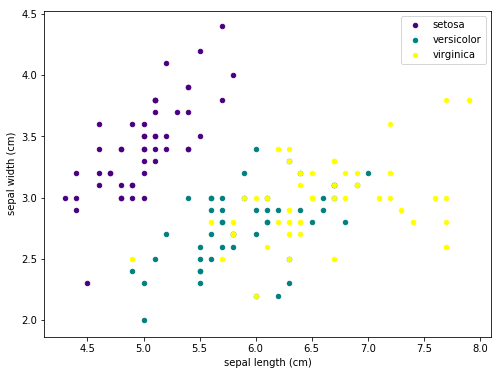

In [10]:
colors = ['indigo', 'teal', 'yellow']

fig, ax = plt.subplots(1, 1, figsize=(8,6))

for key, row in iris_df.groupby('label'):
    row.plot.scatter(ax=ax, x='sepal length (cm)', y='sepal width (cm)', label=target_names[key], color=colors[key]);

## Linear Classification

While we won't implement any linear classifiers in this class, this is a very simple way to approach classifying bi-class datasets. For this dataset, we can see that we can differentiate between one type of iris, and a combination of two other types. This is the closest we can get.

![Linear classification with iris dataset](files/linear_classification.jpg "Linear classification with iris dataset")


Classification is defined as the task of predicting the correct label or category of an unknown point. With two classes, we divide the data space into two halves, one for each class. So when we receive a new point, we simply find which side of the partition the point is in. Consider the standard equation for a line such as the one above:
\begin{align}
y &= mx + b
\end{align}

For any given x value, we can determine if y is above or below the line, and with this information, we can determine if our point belongs to the group setosa, or the group versicolor/virginica.

## K-Nearest Neighbors

The k-nearest-neighbors algorithm is a classification algorithm, and it is supervised: it takes a bunch of labeled points and uses them to learn how to label other points. To label a new point, it looks at the labeled points closest to that new point (those are its nearest neighbors), and has those neighbors vote, so whichever label most of the neighbors have is the label for the new point (the “k” is the number of neighbors it checks).

Let's create a new point and see if we can't implement KNN on our own.

In [11]:
new_x, new_y = 6.5, 3.7

Text(6.9, 3.9000000000000004, '')

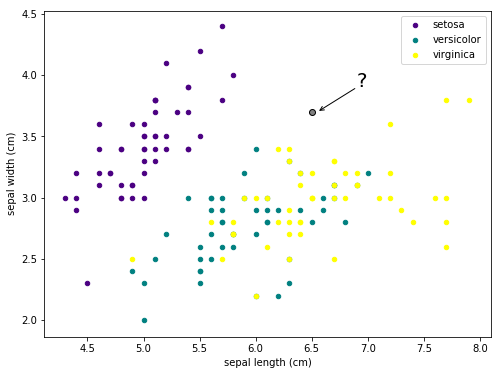

In [12]:
# Plot the original points again
colors = ['indigo', 'teal', 'yellow']

fig, ax = plt.subplots(1, 1, figsize=(8,6))

for key, row in iris_df.groupby('label'):
    row.plot.scatter(ax=ax, x='sepal length (cm)', y='sepal width (cm)', label=target_names[key], color=colors[key]);

# This time we add the new point as a grey dot 
# and add an arrow pointing at it
plt.scatter(new_x, new_y, c='grey', cmap=None, edgecolor='k')
plt.annotate('?', (new_x+0.45, new_y+0.25), fontsize=20, horizontalalignment='center', verticalalignment='center')
plt.annotate("", xytext=(new_x+0.4, new_y+0.2), xy=(new_x+0.05, new_y), arrowprops=dict(arrowstyle="->"))

In [13]:
# We take the sum of the squares of all the values in dataset 
# in order to determine the distance from the new point.
# iris_df.iloc[:, :2].values grabs the first two columns of
# our pandas dataframe as a numpy array

distances = np.sum((iris_df.iloc[:, :2].values - [new_x, new_y])**2, axis=1)

# find the index of the point whose distance is lowest
closest_point = np.argmin(distances)

# We can now access the row from the dataframe that is closest
iris_df.iloc[closest_point]

sepal length (cm)          6.3
sepal width (cm)           3.4
petal length (cm)          5.6
petal width (cm)           2.4
label                        2
label_name           virginica
Name: 136, dtype: object

By looking at the closest neighbor to the point, we were able to determine that the unknown point is likely virginica. But this is an analysis of k=1, and there is likely more accuracy to be had with higher values of k. We could also increase our accuracy by using all four dimensions in the dataset, but won't be able to visualize the process.

## Using Scikit-learn

Scikit-learn has a built in KNN implementation that is faster easier to use than our homemade version. Let's see how accurate of a model we can make using it.

In [14]:
# First lets grab our four columns of values
# and the one column of class names
X = iris_df.iloc[:, :-1].values
y = iris_df.iloc[:, 5].values

First we split our dataset in train and test datasets - we'll be using 80% for training data, and 20% for test data. You can read more about this process [here](https://medium.com/@contactsunny/how-to-split-your-dataset-to-train-and-test-datasets-using-scikit-learn-e7cf6eb5e0d)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Before making any predictions, we'll want to scale our data so it is all uniformly evaluated. From Wikipedia:

> Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

We're finally ready to train our classifier. First we import the KNeighborsClassifier from sklearn.neighbors. We then initialize our KNN classifier to check the 5 nearest neighbors (n_neighbors=5). Then we fit our classifier to the training data. It's important to note that we are choosing 5 somewhat randomly.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

The final step is to make predictions on our test data. Using the classifier.predict function, we evaluate our classifier

In [18]:
y_pred = classifier.predict(X_test)

### Evaluating the algorithm

In order to evaluate our algorithm, we can look at the confustion matrix, precision, recall, and f1 score (more [here](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9)).

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  0  0]
 [ 0  4  0]
 [ 0  0 15]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00         4
   virginica       1.00      1.00      1.00        15

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



We can see that our model was able to classify all 30 records in the test set with 100% accuracy which is really great for a first try! Don't expect this with all applications though, especially higher dimensional or categorical features.

### Error rate vs K

As noted above, k=5 was somewhat randomly chosen. But instead of randomly choosing k=5, we can plot k for many values and plot the results in order to choose the best value. K values can be a comprimise between accuracy and speed, with higher values requiring more computation and lower values being less accurate.

Let's keep all the error values from k=1 to k=40 in a array and plot them on a graph.

In [24]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

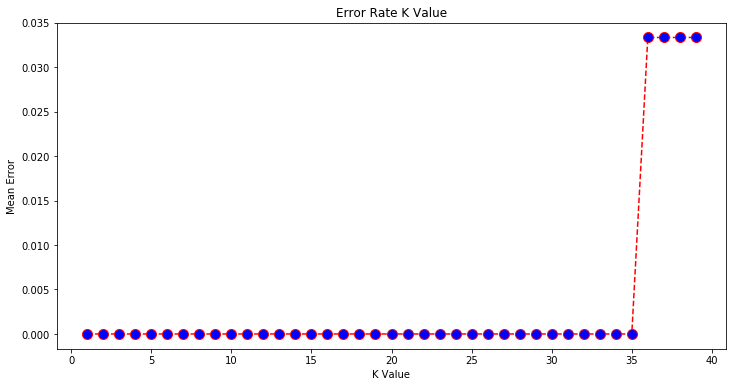

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

From this output we can see that the optimal values for K are between 1 and 35